In [1]:
using Plots, DelimitedFiles

In [2]:
Plots.default(
#    grid = false,
    size = (400,400),
    fontfamily="serif-roman", 
    titlefontsize =12 ,   
    markerstrokewidth = 1,        # border around dots
#    markersize = 3
)

# 1. epsilon-coupling 

In [3]:
path = "../data_epsilon_coupling/"

"../data_epsilon_coupling/"

### PF00397

In [4]:
L=31

#data obtained with damping 0.9 -> pb of convergence for epsilon larger than 0.5
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_397 = res_epsilon[1,:]
μΔEs_397 = res_epsilon[2,:]./L
σΔEs_397 = res_epsilon[3,:]./L
μdist_397 = res_epsilon[6,:]
σdist_397 = res_epsilon[7,:]
μE_397 = res_epsilon[8,:]./L
σE_397 = res_epsilon[9,:]./L
μU_397 = res_epsilon[10,:]./L
σU_397 = res_epsilon[11,:]./L
μS_397 = res_epsilon[12,:]./L
σS_397 = res_epsilon[13,:]./L
μpolars_397 = res_epsilon[14,:]
σpolars_397 = res_epsilon[15,:];


In [5]:
#data obtained with a smaller damping -> help for convergence
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed_damp0p5.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_397d = res_epsilon[1,:]
μΔEs_397d = res_epsilon[2,:]./L
σΔEs_397d = res_epsilon[3,:]./L
μdist_397d = res_epsilon[6,:]
σdist_397d = res_epsilon[7,:]
μE_397d = res_epsilon[8,:]./L
σE_397d = res_epsilon[9,:]./L
μU_397d = res_epsilon[10,:]./L
σU_397d = res_epsilon[11,:]./L
μS_397d = res_epsilon[12,:]./L
σS_397d = res_epsilon[13,:]./L
μpolars_397d = res_epsilon[14,:]
σpolars_397d = res_epsilon[15,:];


### PF00684

In [7]:
L=67

#data obtained with a smaller damping -> help for convergence
namefile = path * "run_epsilon_PF00684_sce_7_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_684 = res_epsilon[1,:]
μΔEs_684 = res_epsilon[2,:]./L
σΔEs_684 = res_epsilon[3,:]./L
μdist_684 = res_epsilon[6,:]
σdist_684 = res_epsilon[7,:]
μE_684 = res_epsilon[8,:]./L
σE_684 = res_epsilon[9,:]./L
μU_684 = res_epsilon[10,:]./L
σU_684 = res_epsilon[11,:]./L
μS_684 = res_epsilon[12,:]./L
σS_684 = res_epsilon[13,:]./L
μpolars_684 = res_epsilon[14,:]
σpolars_684 = res_epsilon[15,:];


In [8]:
pΔ = scatter(-epsilons_397[1:5], μΔEs_397[1:5],  yerr=σΔEs_397[1:5], label="PF00397", legend=:topleft, color="red")
scatter!(-epsilons_397d, μΔEs_397d,  yerr=σΔEs_397d, legend=:topleft, color="red", label="")
scatter!(-epsilons_684, μΔEs_684,  yerr=σΔEs_684, legend=:topleft, color="black", label="PF00684")

xlabel!("\$ \\epsilon\$")
ylabel!("\$ \\Delta e_{\\min}\$")
hline!([0.0], label="", color="black")

pdist = scatter(-epsilons_397[1:5], μdist_397[1:5], yerr=σdist_397, label="PF00397", legend=:topleft, color="red")
scatter!(-epsilons_397d, μdist_397d, yerr=σdist_397d, legend=:topleft, color="red", label="")
scatter!(-epsilons_684, μdist_684, yerr=σdist_684, legend=:topleft, color="black", label="PF00684")

hline!([0.0], label="", color="black")
xlabel!("\$ \\epsilon\$")
ylabel!("Hamming distance")

pu = scatter(-epsilons_397[1:5], μE_397[1:5], yerr=σE_397[1:5], label="ground state PF00397", legend=:topleft, color = "red")
scatter!(-epsilons_397d, μE_397d, yerr=σE_397d, color="red", label="")
scatter!(-epsilons_684, μE_684, yerr=σE_684, color="black", label="ground state PF00684")
scatter!(-epsilons_397[1:5], μU_397[1:5], yerr=σU_397[1:5], label="average PF00397", color = "orange")
scatter!(-epsilons_397d, μU_397d, yerr=σU_397d, color="orange", label="")
scatter!(-epsilons_684, μU_684, yerr=σU_684, color="gray", label="average PF00684")

xlabel!("\$ \\epsilon\$")
ylabel!("energy density")
ps = scatter(-epsilons_397[1:5], μS_397[1:5], yerr=σS_397[1:5], legend=:topleft, color = "red", label="PF00397")
scatter!(-epsilons_397d, μS_397d, yerr=σS_397d, color="red", label="")
scatter!(-epsilons_684, μS_684, yerr=σS_684, color="black", label="PF00684")
#scatter!(-epsilons, μpolars, yerr=σpolars, legend=:topleft, color = "black", label="")

xlabel!("\$ \\epsilon\$")
ylabel!("entropy density")
hline!([0.0], label="", color="black", legend=:bottomright);

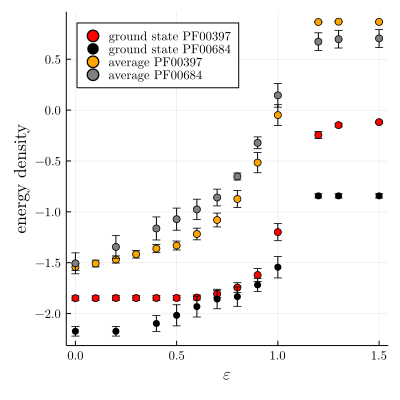

In [9]:
pu

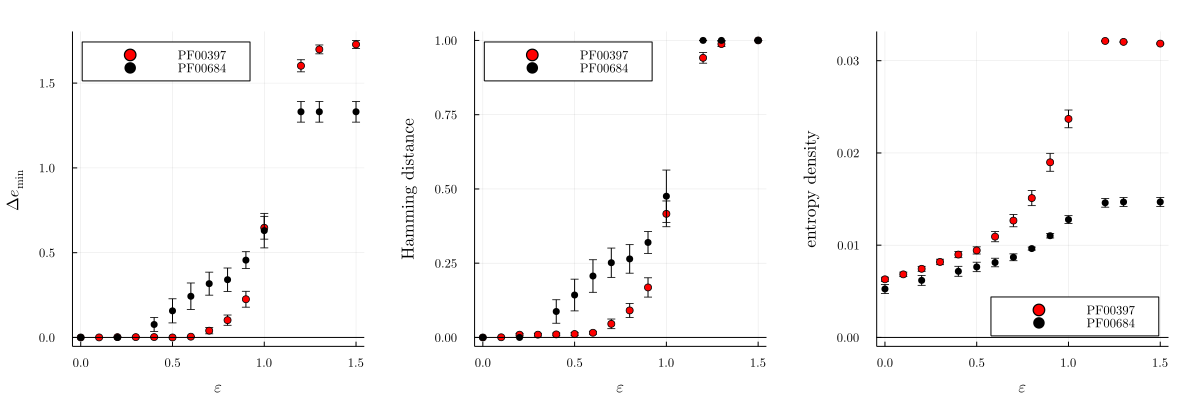

In [12]:
plot(pΔ, pdist, ps, size=(1200,400), layout=(1,3), margin=6*Plots.mm)

In [13]:
savefig("epsilon_coupling.pdf")

# 2. Sequence-based metrics: comparison between hmmer and SCE:

# 2.1 On PF00397

In [4]:
namefile = "data_compareMSA_PF00397_hmmerSCE.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p1 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p2 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p3 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p4 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p5 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

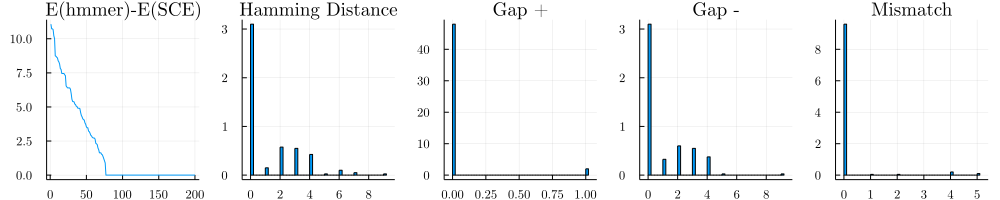

In [5]:
plot(p1, p2, p3, p4, p5, size = (1000, 200), layout = (1,5))

# 2.2 On PF00684

In [6]:
namefile = "data_compareMSA_PF00684_hmmerMF.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p6 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p7 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p8 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p9 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p10 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

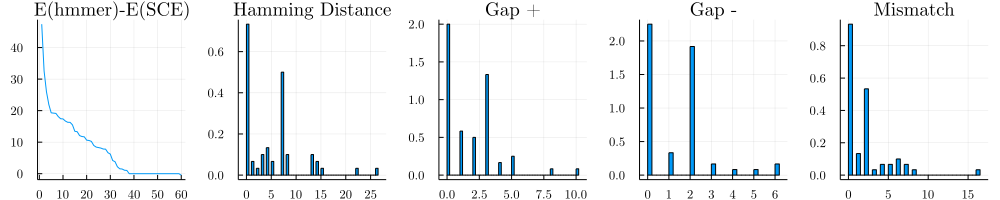

In [7]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5))

In [8]:
namefile = "data_compareMSA_PF00684_hmmerSCE.txt"
data_seqs = readdlm(namefile);

diffE = data_seqs[1,:];
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

p6 = plot(sort(diffE,rev=true), title="E(hmmer)-E(SCE)", label="")
p7 = histogram(Hdist, bins = 50, normed = true, title = "Hamming Distance", label="")
p8 = histogram(Gp, bins = 50, normed = true, title = "Gap +", label="")
p9 = histogram(Gm, bins = 50, normed = true, title = "Gap -", label="")
p10 = histogram(Mism, bins = 50, normed = true, title = "Mismatch", label="");

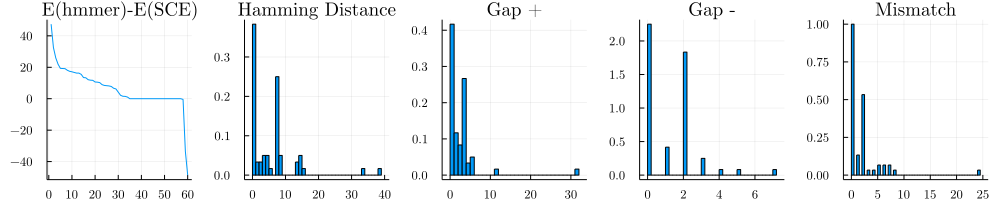

In [9]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5))

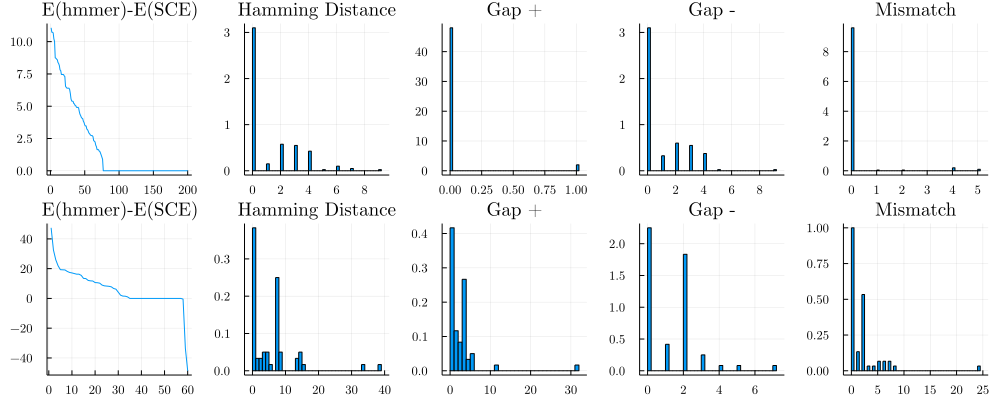

In [10]:
p = plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, size = (1000, 400), layout = (2,5))

In [11]:
savefig("seqs_hmmerSCE.pdf")

# 3. Seq-based metrics: comparison of decoding methods:

In [12]:
namefile = "data_compareMSA_decodings.txt"
data_seqs = readdlm(namefile);

diffE_PF00397_mf = data_seqs[1,1:200];
diffE_PF00397_sce = data_seqs[2,1:200]
diffE_PF00684_mf = data_seqs[3,1:60]
diffE_PF00684_sce = data_seqs[4,1:60];

p1 = plot(sort(diffE_PF00397_mf,rev=true), title="PF00397 (mf)", label="")
p2 = plot(sort(diffE_PF00397_sce,rev=true), title="PF0397 (sce)", label="")
p3 = plot(sort(diffE_PF00684_mf,rev=true), title="PF00684 (mf)", label="")
p4 = plot(sort(diffE_PF00684_sce,rev=true), title="PF00684 (sce)", label="");


In [13]:
findmax(diffE_PF00684_sce), findmin(diffE_PF00684_sce)

((212.27101, 36), (-48.134937, 48))

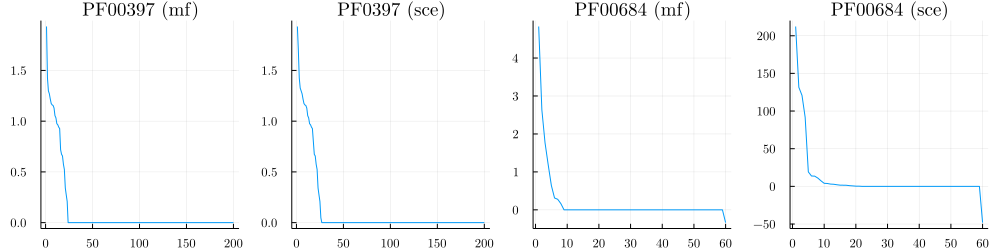

In [14]:
plot(p1, p2, p3, p4, size = (1000, 250), layout = (1,4))

In [15]:
savefig("seqs_decodings.pdf")

# 3. Viterbi Sampling

In [16]:
samps = [23083, 3369, 39260, 6922];

In [29]:
path = "../data_Viterbi_sampling/"
namefile = path * "Viterbi_sampling_"*string(samps[1])*".txt"
data_vitsamp = readdlm(namefile);

diffE = data_vitsamp[5,:]
Hdist = data_vitsamp[6,:];
Gp = data_vitsamp[7,:];
Gm = data_vitsamp[8,:];
Mism = data_vitsamp[9,:];

bins = 50

p1 = plot(sort(diffE,rev=false), label="", title="E(sampled)-E(min)")
p2 = histogram(Hdist, bins = bins, normed = true, label="", title="Hamming distance")
p3 = histogram(Gp, bins = bins, normed = true, title = "Gap +", label="")
p4 = histogram(Gm, bins = bins, normed = true, title = "Gap -", label="")
p5 = histogram(Mism, bins = bins, normed = true, title = "Mismatch", label="");

In [30]:
for i=2:length(samps)
    namefile = path * "Viterbi_sampling_"*string(samps[i])*".txt"
    data_vitsamp = readdlm(namefile);

    diffE = data_vitsamp[5,:]
    Hdist = data_vitsamp[6,:];
    Gp = data_vitsamp[7,:];
    Gm = data_vitsamp[8,:];
    Mism = data_vitsamp[9,:];

    plot!(p1, sort(diffE,rev=false), label="")
    histogram!(p2, Hdist, bins = bins, normed = true, label="");
    histogram!(p3, Hdist, bins = bins, normed = true, label="");
    histogram!(p4, Hdist, bins = bins, normed = true, label="");
    histogram!(p5, Hdist, bins = bins, normed = true, label="");
end

sum(Gm) / 5000 = 0.0334


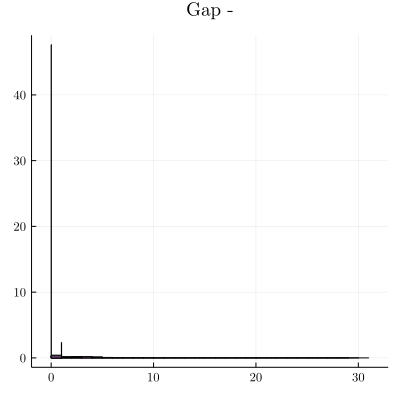

In [41]:
@show sum(Gm)/5000
p4

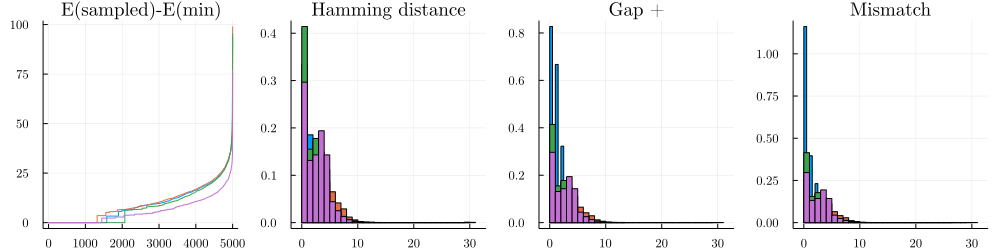

In [42]:
plot(p1, p2, p3, p5, size = (1000, 250), layout = (1,4))

In [43]:
savefig("viterbi_sampling.pdf")